In [69]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [70]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [71]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [72]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [73]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [74]:
# View all of the classes that automap found
Base.classes.keys() 

['measurement', 'station']

In [75]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [76]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [77]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()

print(most_recent_date)

2017-08-23


           Date  Precipitation
0    2016-08-24           0.08
1006 2016-08-24            NaN
1524 2016-08-24           2.15
702  2016-08-24           2.28
360  2016-08-24           2.15
Mean: 0.17646153846153848
Median: 0.02
Standard Deviation: 0.4602883636813257


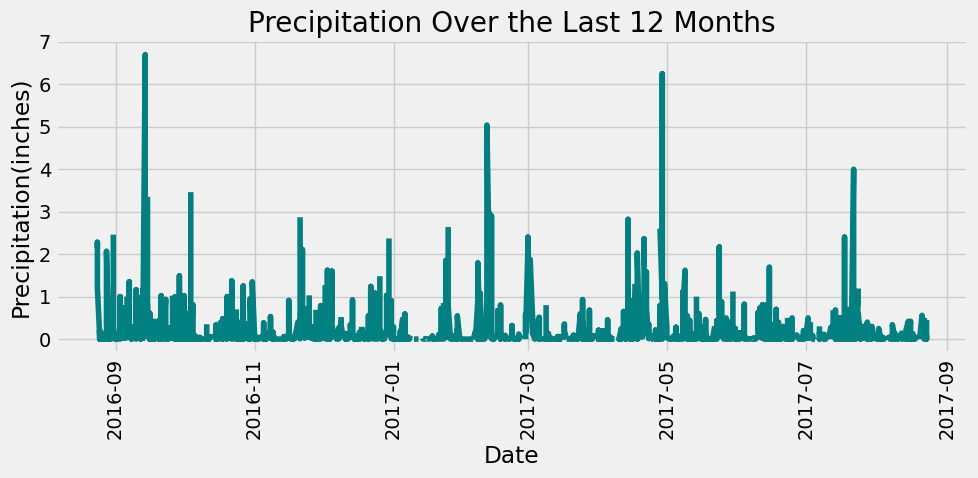

In [86]:


# Convert 'Date' column to datetime if it's in object format
df['Date'] = pd.to_datetime(df['Date'])

# Find the most recent date
most_recent_date = df['Date'].max()

# Calculate the date one year ago
one_year_ago = most_recent_date - pd.DateOffset(years=1)

# Filter data to include only the last 12 months
last_12_months_data = df[df['Date'] >= one_year_ago]

# Check for missing values (NaN) in the Precipitation column
missing_values = last_12_months_data['Precipitation'].isnull().sum()

df_cleaned = last_12_months_data.dropna(subset=['Precipitation'])

# Print the first few rows of the filtered data
print(last_12_months_data.head())

#Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize = (10, 5))
plt.plot(last_12_months_data['Date'], last_12_months_data['Precipitation'], label = 'Precipitaion', color = 'teal')
plt.xlabel('Date')
plt.ylabel('Precipitation(inches)')
plt.title('Precipitation Over the Last 12 Months')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show

mean_precip = df_cleaned['Precipitation'].mean()
median_precip = df_cleaned['Precipitation'].median()
std_precip = df_cleaned['Precipitation'].std()

print(f"Mean: {mean_precip}")
print(f"Median: {median_precip}")
print(f"Standard Deviation: {std_precip}")



In [ ]:
# # Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# # Starting from the most recent data point in the database. 
# # most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')

# # Calculate the date one year from the last date in data set.
# #one_year_ago = most_recent_date - dt.timedelta(days = 365)

# # Perform a query to retrieve the data and precipitation scores
# #twelve_months_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago)

# # Save the query results as a Pandas DataFrame. Explicitly set the column names
# df = pd.DataFrame(twelve_months_data, columns = ['Date', 'Precipitation'])

# # Check for missing values (NaN) in the Precipitation column
# #missing_values = df['Precipitation'].isnull().sum()

# # Convert the 'Date' column to datetime type
# df['Date'] = pd.to_datetime(df['Date'])

# #df_cleaned = df.dropna(subset=['Precipitation'])

# # Convert the 'Date' column to datetime (if not already in datetime format)
# #df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# #Sort the dataframe by date
# df.sort_values(by = 'Date', inplace = True)

# #print(df_cleaned)

# #Use Pandas Plotting with Matplotlib to plot the data
# plt.figure(figsize = (10, 5))
# plt.plot(df['Date'], df['Precipitation'], label = 'Precipitaion', color = 'teal')
# plt.xlabel('Date')
# plt.ylabel('Precipitation(inches)')
# plt.title('Precipitation Over the Last 12 Months')
# plt.xticks(rotation = 90)
# plt.tight_layout()
# plt.show

# print(df.dtypes)


In [85]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df_cleaned['Precipitation'].describe()

summary_stats

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [87]:
# Close Session
session.close()